In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

## LOADING DATA

In [2]:
titanic_train = pd.read_csv("../input/train.csv")
titanic_test = pd.read_csv("../input/test.csv")

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## IMPORTANT INFO ABOUT DATA

In [4]:
titanic_train.shape

(891, 12)

In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**We can observe that 177 datapoints in the "Age" column are missing and approximately 80% of the data in the "Cabin" column is missing. The "Embarked" column has 2 data points missing.**

In [6]:
unique = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
unique_dict = {}
for itm in unique:
    unique_dict[itm] = titanic_train[itm].unique()

In [7]:
unique_dict

{'Embarked': array(['S', 'C', 'Q', nan], dtype=object),
 'Parch': array([0, 1, 2, 5, 3, 4, 6]),
 'Pclass': array([3, 1, 2]),
 'Sex': array(['male', 'female'], dtype=object),
 'SibSp': array([1, 0, 3, 4, 2, 5, 8])}

**The above confirms that this list of columns do not contain any absurd or negative values.**

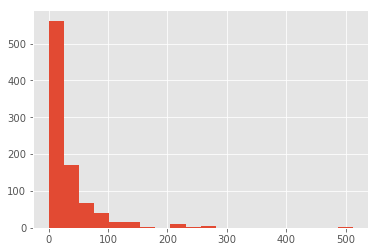

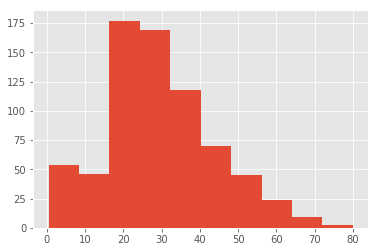

In [8]:
plt.hist(titanic_train["Fare"], bins=20)
plt.show()
plt.hist(titanic_train["Age"].dropna(), bins=10)
plt.show()

**The above confirms that the "Age" column and "Fare" column do not have an absurd or negative values.**

## CLEANING UP DATA

- When you observe the data, the columns "PassengerId", "Name" and "Ticket" clearly are not useful in predicting survival.
- Also 80% of data is missing in the "Cabin" column.
- Set "PassengerId" as the index and delete the rest of the three columns.

In [9]:
del_list = ["Name","Ticket","Cabin"]
for itm in del_list:
    del titanic_train[itm]
titanic_train.set_index("PassengerId", inplace=True)

In [10]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


- To apply and machine learning model, we need to make sure all the columns are numeric.
- **Converting all non-numeric columns into numeric**

In [11]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


**"Sex" and "Embarked" columns need to be changed to numeric.**
- Assigning 1-Male, 0-Female
- Assigning C-1, Q-2, S-3

In [12]:
titanic_train["Sex"] = titanic_train["Sex"].replace(["male","female"],[1,0])
titanic_train["Embarked"] = titanic_train["Embarked"].replace(["C","Q","S"],[1,2,3])

In [13]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null float64
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


**Replace the two NaNs with the most repeated values in the "Embarked" column and convert the column to 'int' datatype**

In [14]:
titanic_train["Embarked"].value_counts()

3.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [15]:
titanic_train["Embarked"].fillna(3.0, inplace=True)
titanic_train["Embarked"] = titanic_train["Embarked"].astype(np.int64)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


**We now have a cleaned data set. The "Age" column is missing approximatesly 200 data points. If we delete the rows in this column that are NaN, that is deleting 20% of the data. This can significantly reduce our prediction accuracy.
In such a case there are three possible ways we can make the predictions.**
1. **Delete the "Age" column completely.**
2. **Delete the rows with NaN in the "Age" column.**
3. **Fill the NaN cells of "Age" column with random numbers that lie inside the distribution with mean and standard deviation of the rest of the ages.** 

**The first two options lead to a loss of information. In the third option, though we are introducing random information, it is atleast no leading to any loss of information which could lead to a lower prediction accuracy.**

**We will select the third option.**

In [16]:
age_len = titanic_train["Age"].isnull().sum()
age_mean = titanic_train["Age"].mean()
age_std = titanic_train["Age"].std()
#random number between age_mean-age_std, age_mean+age_std
rand_nos = np.random.randint(age_mean-age_std, age_mean+age_std, age_len)

fltr = np.isnan(titanic_train["Age"])
titanic_train["Age"][fltr] = rand_nos

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### CREATE DUMMIES FOR "Pclass", "Embarked".

In [17]:
Pclass_dummies = pd.get_dummies(titanic_train["Pclass"])
Pclass_dummies.columns = ['Pclass_1','Pclass_2','Pclass_3']
Pclass_dummies.index = titanic_train.index
titanic_train = pd.concat([titanic_train, Pclass_dummies], axis=1)
titanic_train.drop('Pclass', axis=1, inplace=True)

Embarked_dummies = pd.get_dummies(titanic_train["Embarked"])
Embarked_dummies.columns= ['Embarked_C', 'Embarked_Q', 'Embarked_S']
Embarked_dummies.index = titanic_train.index
titanic_train = pd.concat([titanic_train, Embarked_dummies], axis=1)
titanic_train.drop('Embarked', axis=1, inplace=True)

titanic_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
2,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
3,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
4,1,0,35.0,1,0,53.1000,1,0,0,0,0,1
5,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


### COMBINE "SibSp" and "Parch" IN ONE COLUMN
**The columns "SibSp" and "Parch" can be combined into one column called "Relatives". If the individual has relatives on the ship with him, the column will show 1 otherwise 0.**

In [18]:
titanic_train["Relatives"] = titanic_train["SibSp"] + titanic_train["Parch"]
titanic_train["Relatives"][(titanic_train["Relatives"] == 0)] = 0
titanic_train["Relatives"][(titanic_train["Relatives"] != 0)] = 1
titanic_train.drop(['SibSp','Parch'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived      891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Relatives     891 non-null int64
dtypes: float64(2), int64(3), uint8(6)
memory usage: 47.0 KB


In [20]:
titanic_train["Sex"] = titanic_train["Sex"].astype(np.uint8)
titanic_train["Relatives"] = titanic_train["Relatives"].astype(np.uint8)

## MODEL SELECTION AND PREDICTION ERRORS

In [21]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [22]:
features = titanic_train.columns
features = list(features)
features.remove("Survived")
features

['Sex',
 'Age',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Relatives']

In [23]:
kf = KFold(n_splits=4, shuffle=True, random_state=1)

### LOGISTIC REGRESSION

In [24]:
logreg = LogisticRegression()
acc = cross_val_score(logreg, titanic_train[features], titanic_train['Survived'], scoring='accuracy', cv=kf)
logreg_acc = np.mean(acc)
print(logreg_acc)

0.78339999192


### RANDOM FORESTS

**We can select the number of estimators and minimum sample leaf combination by running the classifier through different combinations and choosing the one with the highest score.**
- For n_estimators let's go until 300 in jumps of 10 starting with 10
- For min_samples_leaf we will iterate through 1 to 10

In [25]:
n = range(10,300,10)
l = range(1,11)
n_l_s = []
for i in n:
    for j in l:
        temp = [i,j]
        n_l_s.append(temp)

In [26]:
highest_rf_acc = 0
lowesterrorcomb = list()
for comb in n_l_s:
    rf = RandomForestClassifier(n_estimators=comb[0], random_state=2, min_samples_leaf=comb[1])
    acc = cross_val_score(rf,titanic_train[features], titanic_train['Survived'], scoring='accuracy', cv=kf)
    rf_acc = np.mean(acc)
    if rf_acc > highest_rf_acc:
        highest_rf_acc = rf_acc
        lowesterrorcomb = comb

print(highest_rf_acc)
print(lowesterrorcomb)

0.822693208904
[40, 2]


### K NEAREST NEIGHBORS

In [27]:
knn = KNeighborsClassifier(n_neighbors=20)
acc = cross_val_score(knn,titanic_train[features], titanic_train['Survived'], scoring='accuracy', cv=kf)
knn_acc = np.mean(acc)
print(knn_acc)

0.682467781683


### SUPPORT VECTOR MACHINES

In [28]:
svc = SVC(probability=True)
acc = cross_val_score(svc,titanic_train[features], titanic_train['Survived'], scoring='accuracy', cv=kf)
svc_acc = np.mean(acc)
print(svc_acc)

0.663369086575


### NAIVE BAYES

In [29]:
nb = GaussianNB()
acc = cross_val_score(nb,titanic_train[features], titanic_train['Survived'], scoring='accuracy', cv=kf)
nb_acc = np.mean(acc)
print(nb_acc)

0.766593948208


**It is clear that Random Forests has a significatly higher prediction accuracy than the other classifiers. We will use Random Forests to make out final prediction.**

**First let us clean up the test data and make it classifier ready.**

## CLEANING TEST DATA

In [30]:
titanic_test.shape

(418, 11)

In [31]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
unique = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
unique_dict = {}
for itm in unique:
    unique_dict[itm] = titanic_test[itm].unique()

In [33]:
unique_dict

{'Embarked': array(['Q', 'S', 'C'], dtype=object),
 'Parch': array([0, 1, 3, 2, 4, 6, 5, 9]),
 'Pclass': array([3, 2, 1]),
 'Sex': array(['male', 'female'], dtype=object),
 'SibSp': array([0, 1, 2, 3, 4, 5, 8])}

**Above shows no negative or absurd values.**

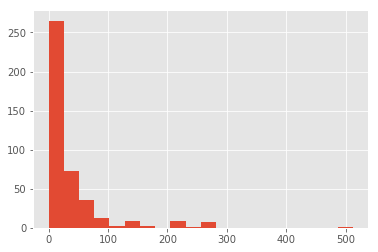

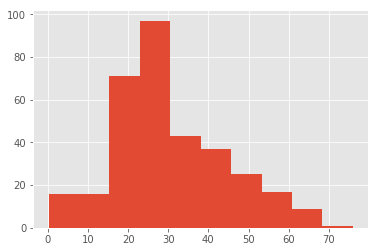

In [34]:
plt.hist(titanic_test["Fare"].dropna(), bins=20)
plt.show()
plt.hist(titanic_test["Age"].dropna(), bins=10)
plt.show()

**Removing columns "Name", "Ticket", "Cabin".**

In [35]:
del_list = ["Name","Ticket","Cabin"]
for itm in del_list:
    del titanic_test[itm]
titanic_test.set_index("PassengerId", inplace=True)

In [36]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [37]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


**Converting "Sex" and "Embarked" into numeric columns.**

In [38]:
titanic_test["Sex"] = titanic_test["Sex"].replace(["male","female"],[1,0])
titanic_test["Embarked"] = titanic_test["Embarked"].replace(["C","Q","S"],[1,2,3])

In [39]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


**Replacing NaNs in "Fare" and "Age" columns**
- Replace the one Nan in "Fare" column with the mean value of all the other columns.
- Replace the NaNs in Age column with random numbers that lie with-in a distribution with mean and standard deviation of rest of the Ages.

In [40]:
titanic_test["Fare"].fillna(titanic_test["Fare"].mean(), inplace=True)

In [41]:
age_len = titanic_test["Age"].isnull().sum()
age_mean = titanic_test["Age"].mean()
age_std = titanic_test["Age"].std()
#random number between age_mean-age_std, age_mean+age_std
rand_nos = np.random.randint(age_mean-age_std, age_mean+age_std, age_len)

fltr = np.isnan(titanic_test["Age"])
titanic_test["Age"][fltr] = rand_nos

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


**Creating Dummies for "Pclass" and "Embarked"**

In [43]:
Pclass_dummies = pd.get_dummies(titanic_test["Pclass"])
Pclass_dummies.columns = ['Pclass_1','Pclass_2','Pclass_3']
Pclass_dummies.index = titanic_test.index
titanic_test = pd.concat([titanic_test, Pclass_dummies], axis=1)
titanic_test.drop('Pclass', axis=1, inplace=True)

Embarked_dummies = pd.get_dummies(titanic_test["Embarked"])
Embarked_dummies.columns= ['Embarked_C', 'Embarked_Q', 'Embarked_S']
Embarked_dummies.index = titanic_test.index
titanic_test = pd.concat([titanic_test, Embarked_dummies], axis=1)
titanic_test.drop('Embarked', axis=1, inplace=True)

In [44]:
titanic_test.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
892,1,34.5,0,0,7.8292,0,0,1,0,1,0
893,0,47.0,1,0,7.0000,0,0,1,0,0,1
894,1,62.0,0,0,9.6875,0,1,0,0,1,0
895,1,27.0,0,0,8.6625,0,0,1,0,0,1
896,0,22.0,1,1,12.2875,0,0,1,0,0,1


**Combining "SibSp" and "Parch" into one column "Relatives"**

In [45]:
titanic_test["Relatives"] = titanic_test["SibSp"] + titanic_test["Parch"]
titanic_test["Relatives"][(titanic_test["Relatives"] == 0)] = 0
titanic_test["Relatives"][(titanic_test["Relatives"] != 0)] = 1
titanic_test.drop(['SibSp','Parch'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Sex           418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
Pclass_1      418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Relatives     418 non-null int64
dtypes: float64(2), int64(2), uint8(6)
memory usage: 18.8 KB


In [47]:
titanic_test["Sex"] = titanic_test["Sex"].astype(np.uint8)
titanic_test["Relatives"] = titanic_test["Relatives"].astype(np.uint8)

In [48]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Sex           418 non-null uint8
Age           418 non-null float64
Fare          418 non-null float64
Pclass_1      418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Relatives     418 non-null uint8
dtypes: float64(2), uint8(8)
memory usage: 13.1 KB


## MAKING FINAL PREDICTIONS

In [49]:
rftest = RandomForestClassifier(n_estimators=lowesterrorcomb[0], random_state=3, min_samples_leaf=lowesterrorcomb[1])
rftest.fit(titanic_train[features], titanic_train['Survived'])
titanic_test["Survived"] = rftest.predict(titanic_test[features])

In [50]:
titanic_test.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Relatives,Survived
PassengerId,,,,,,,,,,,
892,1,34.5,7.8292,0,0,1,0,1,0,0,0
893,0,47.0,7.0000,0,0,1,0,0,1,1,0
894,1,62.0,9.6875,0,1,0,0,1,0,0,0
895,1,27.0,8.6625,0,0,1,0,0,1,0,0
896,0,22.0,12.2875,0,0,1,0,0,1,1,1
